In [3]:
import os, numpy as np
# set working dir to repo directory
head, tail = os.path.split(os.getcwd())
while tail != 'aj_python_tool_lib':
    head, tail = os.path.split(head)
os.chdir(os.path.join(head, tail))

from plots.aj_plt_templates import VectorPlotter
from misc_tools.print_latex import print_tex
from scipy.optimize import minimize
from IPython.display import clear_output

### Intro problem:
Consider you have matrix equation C*X = Y.

It can be interpreted geometrically as:

 'which combination of columns of C can construct vector Y'

In [4]:
C = np.eye(3)
y = np.array([[1,1,1]]).T
print_tex('C','X = ', 'y', column=True)
print_tex(C,'X = ', y, column=True)
print_tex(C[:,[0]],'x1+', C[:,[1]],'x2+', C[:,[2]], 'x3 = ', y,column=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

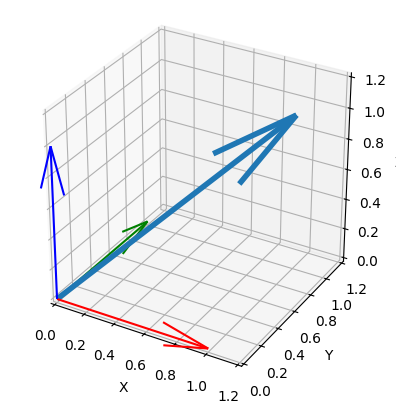

In [5]:
x = np.linalg.inv(C) @ y
print_tex('X = ', x, column=True)
vp = VectorPlotter()
vp.draw_basis()
vp.plot_vector(y.flatten(), lw = 4)#
vp.autoscale(1.2)
vp.show()

### Now consider different C

In [6]:
C = np.array([[1,0,0],[1,1,0],[0,0,0]])
y = np.array([[1,1,1]]).T
print_tex('C','X = ', 'y', column=True)
print_tex(C,'X = ', y, column=True)
print_tex(C[:,[0]],'x1+', C[:,[1]],'x2+', C[:,[2]], 'x3 = ', y,column=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## As you see column space does not span space of Y,
matrix C is not invertible, so no exact solution can be found.

but we can find closest solution by minimizing distance between CX' = Y' and Y, where X' is best guess of coeficients

___This can be done by posing an optimization task: min(norm(Y'-Y))___

There are different norms: L1, L2, ..., common eucledian distance is L2, L1 is a sum of abs of elements

In [7]:
y_flat = y.flatten()
#L1 Minimum norm solution s_L1
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

methods = ['Nelder-Mead','Powell','CG','BFGS',
           'Newton-CG','L-BFGS-B','TNC' ,'COBYLA',
           'SLSQP','trust-constr','dogleg',
           'trust-ncg','trust-exact','trust-krylov']


x0 = np.zeros_like(y_flat) 
constr = ({'type': 'eq', 'fun': lambda x:  C @ x - y_flat})

#results = {}
# for method in methods:
#     try:
#         res = minimize(L1_norm, x0, method=method, constraints=constr)
#         results[method] = res

#     except:
#         results.pop(method,None)

# clear_output()

res = minimize(L1_norm, x0, method='trust-constr',constraints=constr)
x_sol = np.array([res.x]).T
print_tex('closest X` = ', x_sol,', so CX` = ',C @ res.x, 'Y = ', y,column=True)


c:\Users\Hot Mexican\VS_Code_Proj\.venv\lib\site-packages\scipy\optimize\_trustregion_constr\projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +
c:\Users\Hot Mexican\VS_Code_Proj\.venv\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


<IPython.core.display.Math object>

### This result can be interpreted geometrically
Bold blue vector is true solution. Black vector is best result, achieved by optimization. Orange is the distance between them.

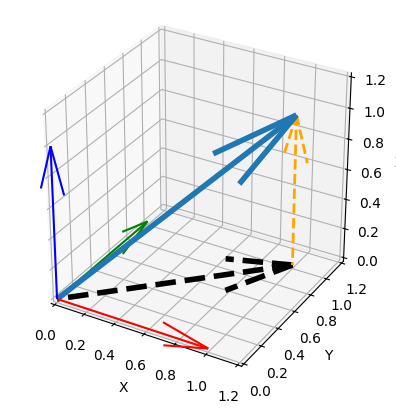

In [8]:
vp = VectorPlotter()
vp.draw_basis()
vp.plot_vector(y.flatten(), lw = 4)
sol_vec = C[:,0]
vp.plot_vector(sol_vec, lw = 4, color = 'k', ls='dashed')
dr = y.flatten()-sol_vec
vp.plot_vector(origin=sol_vec,xyz=dr, lw = 2, color = 'orange', ls='dashed')
vp.autoscale(1.2)
vp.show()


This matrix example can be solved by calcualting pseudo-inverse of C, with a high level function pinv(C).

In [9]:
sol = np.linalg.pinv(C) @ y
print_tex('pseudo inverse solution X`=', sol, column=True)

<IPython.core.display.Math object>